In [113]:
import glob
from fastai.data.all import *
from fastai.vision.all import *

In [136]:
def label_func(fname):
    if 'no' in str(fname):
        return 'no'
    else:
        return 'yes'

In [156]:
dblock = DataBlock(blocks     = (ImageBlock, CategoryBlock),
                   get_items  = get_image_files,
                   splitter   = RandomSplitter(),
                   get_y      = label_func,
                   item_tfms  = (Resize(112)),
                   batch_tfms = aug_transforms(do_flip=False, flip_vert=False, max_rotate=3.0, min_zoom=0.9, max_zoom=1.1))

In [157]:
dls = dblock.dataloaders("images")

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


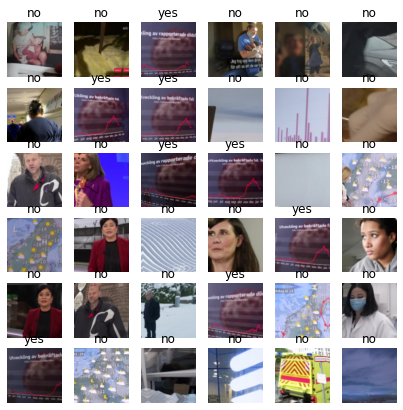

In [158]:
dls.show_batch(max_n=36, figsize=(7,7))

In [159]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.002511886414140463)

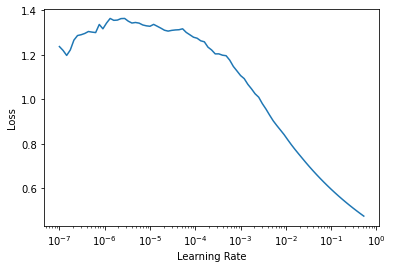

In [160]:
learn.lr_find()

In [161]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.185746,0.012223,0.001523,00:39


epoch,train_loss,valid_loss,error_rate,time
0,0.002514,0.012692,0.003808,00:39
1,0.002875,0.000011,0.000000,00:40


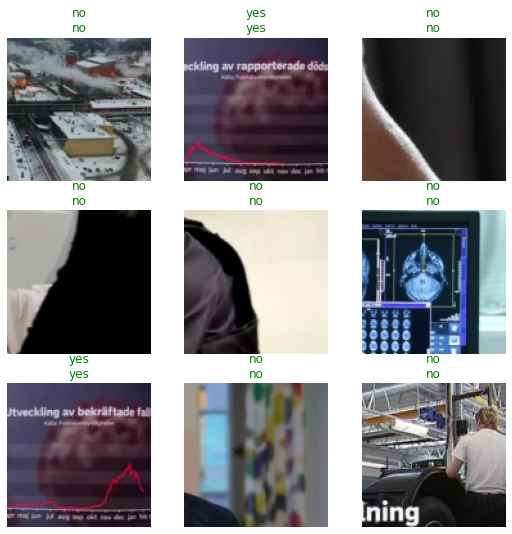

In [163]:
learn.show_results()

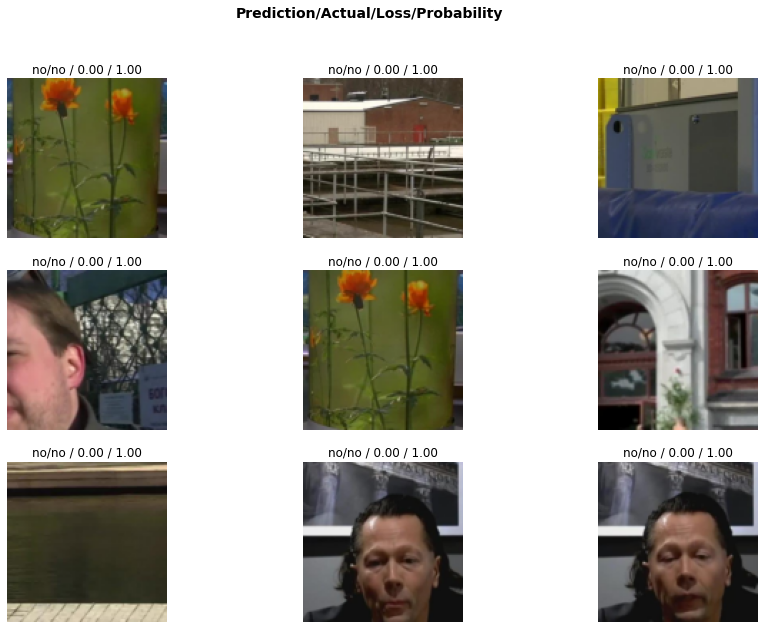

In [167]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [168]:
learn.export()